<font size = '4' color = 'red'> Please do not include my name, thanks!</font>
<br>
Project #2 Proposal
<br>
Proposal:
<br>
For Project #2, I am looking at a dataset that contains mostly real job listings (17,014) mixed with fraudulent job listings (866). Various other attributes of the job listing are included like salary range, if the job involves telecommuting, and whether or not the company has a logo. I will test a few hypothesis about common attributes of 'fake' job postings so that they could, in theory, be identified more easily by filtering algorithims. 
<br>
Hypothesis #1:
<br>
Fake job postings have more missing information when compared to real job postings. They will have more Null, NaN, or zero values when compared to real job postings.
<br>
Hypothesis #2:
<br>
Fake job postings inflate the salary ranges compared to the education expectations of real job postings with similar salary ranges. The average salaries vs. educational requirements will be higher for the fake job. (Presumably to lure unsuspecting applicants)
<br>
Data Source:
<br>
I found this dataset by looking at kaggle.com. This dataset was freely available from the University of Aegean. 
<br>
Original URL: http://emscad.samos.aegean.gr/
<br>
Kaggle URL: https://www.kaggle.com/shivamb/real-or-fake-fake-jobposting-prediction
<br>
Data Characteristics:
<br>
The dataset size is 48 MB and it is comprised of 17 columns with 17,880 rows.

In [1]:
# Import pandas for data analysis and print the version used
import pandas as pd
import matplotlib.pyplot as plt
import re
print(pd.__version__)

0.20.3


In [2]:
# Load the CSV file of the real and fake job data. Use the job_id as the index:
real_and_fake_jobs_df = pd.read_csv("fake_job_postings.csv",index_col="job_id")

In [3]:
# Take a look at the head of the dataframe
real_and_fake_jobs_df.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
job_id,,,,,,,,,,,,,,,,,
1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [4]:
# Check the shape of the dataframe:
real_and_fake_jobs_df.shape

(17880, 17)

In [5]:
# Split the combined dataframe into two separte ones of real and fake jobs based on the fraudulent column:
fake_jobs_df = real_and_fake_jobs_df[real_and_fake_jobs_df["fraudulent"] == 1]
real_jobs_df = real_and_fake_jobs_df[real_and_fake_jobs_df["fraudulent"] == 0]

In [6]:
fake_jobs_df.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
job_id,,,,,,,,,,,,,,,,,
99,IC&E Technician,"US, , Stocton, CA",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abilitie...",BENEFITSWhat is offered:Competitive compensati...,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1
145,Forward Cap.,NaN,NaN,NaN,NaN,The group has raised a fund for the purchase o...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,1
174,Technician Instrument & Controls,US,Power Plant & Energy,NaN,Edison International and Refined Resources hav...,Technician Instrument &amp; ControlsLocation D...,JOB QUALIFICATIONS-Ability to understand proce...,"we are a team of almost 8,000 employees who he...",0,1,1,Full-time,Mid-Senior level,Certification,Electrical/Electronic Manufacturing,Other,1
181,Sales Executive,"PK, SD, Karachi",Sales,NaN,NaN,Sales Executive,Sales Executive,Sales Executive,0,0,0,NaN,NaN,NaN,NaN,Sales,1
216,IC&E Technician Mt Poso,"US, CA, Bakersfield, CA / Mt. Poso",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abiliti...",BENEFITSWhat is offered:Competitive compensati...,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1


<font size = '3' color = 'blue'>First, we will consider the first hypothesis: That fake jobs have, overall, more NaN and null values than their real counterparts.</font>

In [7]:
# Let's take a look at the total number of null values for the fake jobs
fake_jobs_df.isnull().sum()

title                    0
location                19
department             531
salary_range           643
company_profile        587
description              1
requirements           154
benefits               364
telecommuting            0
has_company_logo         0
has_questions            0
employment_type        241
required_experience    435
required_education     451
industry               275
function               337
fraudulent               0
dtype: int64

In [8]:
# Let's take a look at the total number of null values for the real jobs
real_jobs_df.isnull().sum()

title                      0
location                 327
department             11016
salary_range           14369
company_profile         2721
description                0
requirements            2541
benefits                6846
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3230
required_experience     6615
required_education      7654
industry                4628
function                6118
fraudulent                 0
dtype: int64

<font size = '3' color = 'green'>While this is a good way to see all of the null values, some of the columns just accept 0 or 1, so we'll want to see how many of the fake jobs have a 0 for certain columns as well to really get an idea of how much information is missing. We will drop the fraudulent column, however, since that is just to different the real and fake jobs. We will also drop the telecommuting column since that is not really indicative of a poorly-crafted job posting.</font>

In [9]:
fake_jobs_df.drop('fraudulent',axis=1,inplace=True)
fake_jobs_df.drop('telecommuting',axis=1,inplace=True)
real_jobs_df.drop('fraudulent',axis=1,inplace=True)
real_jobs_df.drop('telecommuting',axis=1,inplace=True)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#i

In [10]:
fake_zeroes = fake_jobs_df == 0
fake_zeroes.sum()

title                    0
location                 0
department               0
salary_range             0
company_profile          0
description              0
requirements             0
benefits                 0
has_company_logo       583
has_questions          616
employment_type          0
required_experience      0
required_education       0
industry                 0
function                 0
dtype: int64

In [11]:
real_zeroes = real_jobs_df == 0
real_zeroes.sum()

title                     0
location                  0
department                0
salary_range              0
company_profile           0
description               0
requirements              0
benefits                  0
has_company_logo       3077
has_questions          8472
employment_type           0
required_experience       0
required_education        0
industry                  0
function                  0
dtype: int64

<font size = '3' color = 'green'>Obviously we have a lot more missing values or zeroes with the real jobs, but that's because we just have so many more real jobs (17,014) than fake (866). Because of this, we will compare the percentages of missing values and zeroes instead: 

In [12]:
# Turn the fake df into a series of the percentage of null values:
fake_null_prcnt = fake_jobs_df.isnull().sum() * 100 / len(fake_jobs_df)

In [13]:
# Turn the real df into a series of the percentage of null values:
real_null_prcnt = real_jobs_df.isnull().sum() * 100 / len(real_jobs_df)

In [14]:
# Put the two series into a dataframe so we can compare the more easily:
null_prcnt_df = pd.DataFrame({"Fake" : fake_null_prcnt, "Real" : real_null_prcnt})

In [15]:
null_prcnt_df

,Fake,Real
title,0.000000,0.000000
location,2.193995,1.921947
department,61.316397,64.746679
salary_range,74.249423,84.453979
company_profile,67.782910,15.992712
description,0.115473,0.000000
requirements,17.782910,14.934760
benefits,42.032333,40.237452
has_company_logo,0.000000,0.000000
has_questions,0.000000,0.000000


In [16]:
# First we will compare how many columns in the fake dataframe have a greater percentage of null values than real
compare_df = null_prcnt_df["Fake"] > null_prcnt_df["Real"]
sum(compare_df)

10

In [17]:
# Next we will compare how many columns in the fake dataframe have a lesser percentage of null values than real
compare_df = null_prcnt_df["Fake"] < null_prcnt_df["Real"]
sum(compare_df)

2

<font size = '3' color = 'green'> We can see that there are 10 instances where the percentage of null values in the fake dataframe are greater than those in the real dataframe. There are 2 where the reverse is true. There are 2 that are the same, but these are the ones that accept either 0 or 1 and will be looked at on their own.<br>
<br>
Next, we will also compare the percentage of 0 values for 'has_company_logo' and 'has_questions' between the real and fake job postings.

In [18]:
print("Fake postings without a company logo: " + str(sum((fake_jobs_df['has_company_logo'] == 0)/len(fake_jobs_df)*100))+"%")
print("Fake postings without questions: " + str(sum((fake_jobs_df['has_questions'] == 0)/len(fake_jobs_df)*100))+"%")

Fake postings without a company logo: 67.3210161663%
Fake postings without questions: 71.1316397229%


In [19]:
print("Real postings without a company logo: " + str(sum((real_jobs_df['has_company_logo'] == 0)/len(real_jobs_df)*100))+"%")
print("Real postings without questions: " + str(sum((real_jobs_df['has_questions'] == 0)/len(real_jobs_df)*100))+"%")

Real postings without a company logo: 18.085106383%
Real postings without questions: 49.7942870577%


<font size = '3' color = 'red'> As we can see, a far greater percentage of the fake job postings lack a company logo and fail to ask any questions of the applicants than the real job postings.<br>
<br>
In conjunction with our previous test of null values, we can conclude that the first hypothesis is supported by this analysis. The fake job postings omit more parts of their listings when compared to real job postings. This could be useful information for filtering out fake job postings.

<font size = '3' color = 'blue'>Next we will consider the second hypothesis that has been proposed: Fake job postings will have inflated salary expectations when compared to real job postings with similar education and experience expectations.</font>

<font size = '3' color = 'green'>First we will drop those listings from the dataframe that do not have a salary expectation. We will also drop listings if they have NaN values for both the 'required_experience' and 'required_education' columns. Unfortunately, they are not very useful for evaluating this hypothesis.</font>

In [20]:
# First we will drop all of the rows that have a NaN value for the 'salary_range' column:
real_and_fake_jobs_df.dropna(subset = ['salary_range'],inplace=True)

In [21]:
# Next we will drop all of the rows that have a NaN value for both the 'required_experience' and
# 'required education' columns. As long as they have at least one or the other, we can use it for analysis:
real_and_fake_jobs_df.dropna(how='all',subset = ['required_experience','required_education'],inplace=True)

In [22]:
# Let's take a look at the data to see how that improved things:
real_and_fake_jobs_df

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
job_id,,,,,,,,,,,,,,,,,
7,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,20000-28000,"Founded in 2009, the Fonpit AG rose with its i...",Your Responsibilities: Manage the English-spea...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0
11,ASP.net Developer Job opportunity at United St...,"US, NJ, Jersey City",NaN,100000-120000,NaN,Position : #URL_86fd830a95a64e2b30ceed829e63fd...,Position : #URL_86fd830a95a64e2b30ceed829e63fd...,Benefits - FullBonus Eligible - YesInterview T...,0,0,0,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,0
16,VP of Sales - Vault Dragon,"SG, 01, Singapore",Sales,120000-150000,Jungle Ventures is the leading Singapore based...,About Vault Dragon Vault Dragon is Dropbox for...,Key Superpowers3-5 years of high-pressure sale...,"Basic: SGD 120,000Equity negotiable for a rock...",0,1,1,Full-time,Executive,Bachelor's Degree,Facilities Services,Sales,0
24,"Vice President, Sales and Sponsorship (Busines...","US, CA, Carlsbad",Businessfriend.com,100000-120000,"WDM Group is an innovative, forward thinking d...",#URL_eda2500ddcedb60957fcd7f5b164e092966f8c4e8...,"Job Requirements:A reputation as a ""go-getter""...",Businessfriend will offer a competitive six fi...,0,1,0,Full-time,Executive,Unspecified,Internet,Sales,0
32,Software Applications Specialist,"US, KS,",NaN,50000-65000,NaN,"Day to Day-Install, upgrade and configure web-...",Must Have's3+ years of experience with web-bas...,"Medical, Dental, Vision, Life, Disability, Pre...",0,1,0,Full-time,Associate,Unspecified,Computer Software,Engineering,0
43,Jr. Developer,US,NaN,40000-50000,NaN,Entry level Software DeveloperLocation : Atlan...,NaN,NaN,0,0,0,Full-time,Entry level,Bachelor's Degree,Computer Software,Engineering,0
66,Digital Developer,"NZ, N, Auckland",NaN,60-80,TELL is a digital creative agency.It’s not jus...,We are a boutique digital agency based in Auck...,You will be:A master of HTML5/CSS3Knowledgable...,"60-80K salary, based on experienceSouthern Cro...",0,1,1,Full-time,NaN,Unspecified,Computer Software,Engineering,0
77,Medical Coder,"US, TX, Fort Worth",NaN,65000-70000,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Certified Coder ...,PRODUCTION EXPECTATIONS:Meet claim review quot...,Benefits Offered,0,1,1,Full-time,Associate,High School or equivalent,Hospital & Health Care,Health Care Provider,0
78,Mid-Senior .NET or Xamarin Developer,"US, GA, Atlanta",NaN,75-115,NaN,DataFinch Technologies is the leader in electr...,We are looking for candidates who are generall...,"Health, Vision, Dental, FSA, HSA, 401(k)Privat...",0,0,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Information Technology,0


In [23]:
real_and_fake_jobs_df.shape

(2675, 17)

<font size = '3' color = 'green'>Removing those offending NaN values really reduced our dataframe by a lot.<br>
Unfortuantely, looking at the dataframe above, there are still some problematic entries that might as well be NaN values<br>
For example, some of the salary expectations list '0-0' and some of the required education and required experience are listed as 'Unspecified'. Unfortuantely, we can't use these and they cannot be dropped easily like the NaN values.<br>Let's take a look at all of the unique entries in these columns to see what needs to be cleaned up:</font>

In [24]:
real_and_fake_jobs_df.salary_range.unique()

array(['20000-28000', '100000-120000', '120000-150000', '50000-65000',
       '40000-50000', '60-80', '65000-70000', '75-115', '75000-110000',
       '16000-28000', '95000-115000', '15000-18000', '50000-70000',
       '45000-60000', '30000-40000', '70000-90000', '10000-14000',
       '50-110', '28000-45000', '0-34300', '35000-40000', '44000-57000',
       '18500-28000', '55000-75000', '30000-35000', '0-0', '20000-40000',
       '360000-600000', '50000-80000', '80000-100000', '52000-78000',
       '15750-15750', '40000-65000', '30000-37000', '45000-67000',
       '35000-100000', '180000-216000', '45000-65000', '0-1000',
       '36000-40000', '35000-73000', '19000-19000', '60000-120000',
       '120000-15000000', '42000-55000', '90000-120000', '100000-150000',
       '28000-38000', '1600-1700', '50000-60000', '30000-70000',
       '32000-40000', '50-100', '9000-17000', '23040-28800', '105-110',
       '80000-110000', '13000-16000', '100000-180000', '45000-55000',
       '9000-12000', '50

In [25]:
real_and_fake_jobs_df.required_experience.unique()

array(['Mid-Senior level', 'Executive', 'Associate', 'Entry level', nan,
       'Not Applicable', 'Internship', 'Director'], dtype=object)

In [26]:
real_and_fake_jobs_df.required_education.unique()

array(["Master's Degree", "Bachelor's Degree", 'Unspecified',
       'High School or equivalent', nan, 'Vocational', 'Associate Degree',
       'Certification', 'Professional',
       'Some College Coursework Completed', 'Some High School Coursework',
       'Vocational - Degree', 'Doctorate', 'Vocational - HS Diploma'], dtype=object)

<font size = '3' color = 'green'>Actually, looking through the unique values for salary reveals a number of issues.  The formatting is not consistent and some are even dates!<br>
We will need to clean this up if it is going to be useful to us...</font>

In [27]:
# First we will drop all of the rows with a salary range listed as '0-0':
real_and_fake_jobs_df.drop(real_and_fake_jobs_df[real_and_fake_jobs_df['salary_range'] == '0-0'].index, inplace=True)

In [28]:
# Here we will drop all of the rows that had alpha characters.
# Oddly enough, only one of these was from a fraudulent job posting!
# This takes care of all of the salaries that had a date instead of a number range.
real_and_fake_jobs_df.drop(real_and_fake_jobs_df[real_and_fake_jobs_df['salary_range'].str.contains('[A-Za-z]')].index,inplace=True)

<font size = '3' color = 'green'>We still have a lot of inconsistencies with how the salary ranges of the jobs have been entered.<br> Most have the numbers in the thousands while others just shorten to the tens.<br>
For simplicity's sake we will focus on the upper part of the range and on 0's to any of the shortened entries

In [29]:
# Let's focus solely on the columns of interest now (salary, experience, education, fraudulent status):
salary_df = real_and_fake_jobs_df[['salary_range','required_experience','required_education','fraudulent']]

In [30]:
# Let's separate out the salaries for the fake and real postings
salary_df_fake = salary_df[salary_df['fraudulent'] == 1]
salary_df_real = salary_df[salary_df['fraudulent'] == 0]

In [31]:
# Make a list of the fake salaries, add on the extra 0's, and convert them into integers
salary_upper_list_fake = []
salary_outlier_fake = []

for i in salary_df_fake['salary_range'].str.split("-"):
    # If there is no upper value given, we will get the first value instead through try/except:
    try:
        j = i[1]
    except:
        j = i[0]
    # If the value has only 3 or less digits given, we will add three 0's to put it into the thousandths.
    if len(j) <= 3:
        print('FAKE: Adding 0s to: ' + j)
        j += '000'
        salary_upper_list_fake.append(int(j))
    # We are leaving out any salaries listed in the millions for now, as they seem more likely to be mistakes:
    elif len(j) >= 7:
        print("FAKE: Outlier Salary: " + j)
        salary_upper_list_fake.append("Outlier!")
        salary_df_fake['salary_range']
        salary_outlier_fake.append(int(j))
    else:
        salary_upper_list_fake.append(int(j))
# Make a list of the real salaries, add on the extra 0's, and convert them into integers
salary_upper_list_real = []
salary_outlier_real = []

for i in salary_df_real['salary_range'].str.split("-"):
    try:
     # If there is no upper value given, we will get the first value instead through try/except:
        j = i[1]
    except:
        j = i[0]
    # If the value has only 3 or less digits given, we will add three 0's to put it into the thousandths.
    if len(j) <= 3:
        print('REAL: Adding 0s to: ' + j)
        j += '000'
        salary_upper_list_real.append(int(j))
    # We are leaving out any salaries listed in the millions for now, as they seem more likely to be mistakes:
    elif len(j) >= 7:
        print("REAL: Outlier Salary: " + j)
        salary_upper_list_real.append("Outlier!")
        salary_outlier_real.append(int(j))
    else:
        salary_upper_list_real.append(int(j))

FAKE: Adding 0s to: 20
FAKE: Adding 0s to: 65
FAKE: Adding 0s to: 20
FAKE: Adding 0s to: 65
FAKE: Outlier Salary: 8582080
FAKE: Outlier Salary: 1380000
FAKE: Outlier Salary: 1380000
FAKE: Adding 0s to: 45
FAKE: Adding 0s to: 48
FAKE: Outlier Salary: 1380000
FAKE: Outlier Salary: 1380000
FAKE: Outlier Salary: 1380000
FAKE: Adding 0s to: 20
FAKE: Adding 0s to: 50
FAKE: Adding 0s to: 20
FAKE: Adding 0s to: 20
FAKE: Outlier Salary: 1380000
FAKE: Adding 0s to: 25
FAKE: Adding 0s to: 30
FAKE: Adding 0s to: 25
FAKE: Outlier Salary: 1380000
FAKE: Adding 0s to: 19
FAKE: Adding 0s to: 19
FAKE: Outlier Salary: 1380000
FAKE: Adding 0s to: 30
FAKE: Adding 0s to: 20
FAKE: Adding 0s to: 31
FAKE: Outlier Salary: 1380000
FAKE: Outlier Salary: 1380000
FAKE: Adding 0s to: 20
FAKE: Adding 0s to: 20
FAKE: Adding 0s to: 19
REAL: Adding 0s to: 80
REAL: Adding 0s to: 115
REAL: Adding 0s to: 110
REAL: Outlier Salary: 15000000
REAL: Adding 0s to: 100
REAL: Adding 0s to: 110
REAL: Adding 0s to: 120
REAL: Outlier

In [52]:
print(salary_outlier_fake)
print(salary_outlier_real)

[8582080, 1380000, 1380000, 1380000, 1380000, 1380000, 1380000, 1380000, 1380000, 1380000, 1380000]
[15000000, 1000000, 2000000, 9360000, 1200000000, 1200000, 4000000, 1200000, 15000000, 7000000, 16500000, 1200000, 1000000, 2500000, 1200000, 1800000, 1200000, 1400000, 1200000, 800000000, 2263000, 1500000]


<font size = '3' color = 'blue'>For some reason, there were several salary ranges with the upper limit defined as 1,380,000...<br>
There were also quite a few astronomically large sums in the real salaries, so it is for the best that we excluded all of these.</font>

In [53]:
# Replace the salary_range columns with the new fixed values from the lists made above:
salary_df_fake['salary_range'] = salary_upper_list_fake
salary_df_real['salary_range'] = salary_upper_list_real

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [66]:
# Drop all of the outliers from the dataframes:
salary_df_fake.drop(salary_df_fake[salary_df_fake['salary_range'] == 'Outlier!'].index,inplace=True)
salary_df_real.drop(salary_df_real[salary_df_real['salary_range'] == 'Outlier!'].index,inplace=True)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [67]:
# Create subset dataframes for each of the most important educational requirements, fake jobs:
salary_df_fake_hs = salary_df_fake[salary_df_fake['required_education'] == 'High School or equivalent']
salary_df_fake_crt = salary_df_fake[salary_df_fake['required_education'] == 'Certification']
salary_df_fake_asc = salary_df_fake[salary_df_fake['required_education'] == "Associate Degree"]
salary_df_fake_bch = salary_df_fake[salary_df_fake['required_education'] == "Bachelor's Degree"]
salary_df_fake_mst = salary_df_fake[salary_df_fake['required_education'] == "Master's Degree"]
salary_df_fake_prf = salary_df_fake[salary_df_fake['required_education'] == "Professional"]
salary_df_fake_doc = salary_df_fake[salary_df_fake['required_education'] == "Doctorate"]
fake_ed_list = [salary_df_fake_hs,salary_df_fake_crt,salary_df_fake_asc,salary_df_fake_bch,
                salary_df_fake_mst,salary_df_fake_prf,salary_df_fake_doc]

In [68]:
# Create subset dataframes for each of the most important educational requirements, real jobs:
salary_df_real_hs = salary_df_real[salary_df_real['required_education'] == 'High School or equivalent']
salary_df_real_crt = salary_df_real[salary_df_real['required_education'] == 'Certification']
salary_df_real_asc = salary_df_real[salary_df_real['required_education'] == "Associate Degree"]
salary_df_real_bch = salary_df_real[salary_df_real['required_education'] == "Bachelor's Degree"]
salary_df_real_mst = salary_df_real[salary_df_real['required_education'] == "Master's Degree"]
salary_df_real_prf = salary_df_real[salary_df_real['required_education'] == "Professional"]
salary_df_real_doc = salary_df_real[salary_df_real['required_education'] == "Doctorate"]
real_ed_list = [salary_df_real_hs,salary_df_real_crt,salary_df_real_asc,salary_df_real_bch,
                salary_df_real_mst,salary_df_real_prf,salary_df_real_doc]

In [69]:
ed_list = ['High School or equivalent','Certification',"Associate Degree","Bachelor's Degree","Master's Degree",
          "Professional","Doctorate"]
sal_list = []
for i in fake_ed_list:
    sal_avg = int(sum(i['salary_range'])/len(i))
    sal_list.append(sal_avg)
fake_salary_ed_dict = dict(zip(ed_list,sal_list))

In [78]:
sal_list = []
for i in real_ed_list:
    sal_avg = int(sum(i['salary_range'])/len(i))
    sal_list.append(sal_avg)
real_salary_ed_dict = dict(zip(ed_list,sal_list))

In [79]:
fake_salary_ed_dict

{'Associate Degree': 50000,
 "Bachelor's Degree": 76375,
 'Certification': 72875,
 'Doctorate': 65000,
 'High School or equivalent': 73036,
 "Master's Degree": 54086,
 'Professional': 42000}

In [80]:
real_salary_ed_dict

{'Associate Degree': 55222,
 "Bachelor's Degree": 90112,
 'Certification': 80759,
 'Doctorate': 322500,
 'High School or equivalent': 67742,
 "Master's Degree": 164409,
 'Professional': 99250}

In [85]:
plt.bar(range(len(fake_salary_ed_dict)), list(fake_salary_ed_dict.values()), align='center')
plt.xticks(range(len(fake_salary_ed_dict)), list(fake_salary_ed_dict.keys()),rotation=90)
plt.title("Average Upper Salary Expectation for Fraudulent Job Postings")

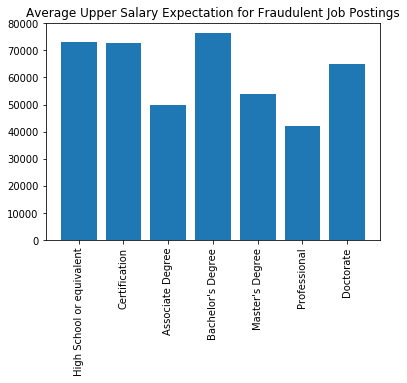

In [86]:
plt.show()

In [87]:
plt.bar(range(len(real_salary_ed_dict)), list(real_salary_ed_dict.values()), align='center')
plt.xticks(range(len(real_salary_ed_dict)), list(real_salary_ed_dict.keys()),rotation=90)
plt.title("Average Upper Salary Expectation for Real Job Postings")

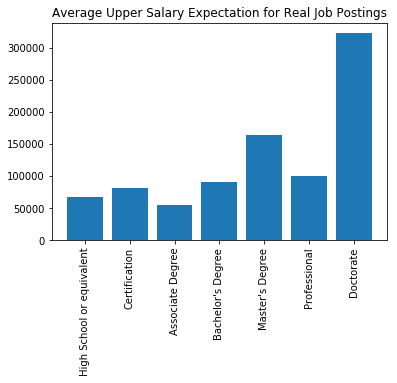

In [88]:
plt.show()

<font size = '3' color = 'green'> Overall, there does not appear to be any indication that the 2nd hypothesis is true. If anything, the salary expectations are too low for the upper-level degrees. This could also be because there are more errors with how Fraudlent jobs are posted. Will need to look at this more and produce better visualizations!</font>